# Make a FisherMatrix object that was only limited by l_max also have a k_max limit

In [423]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

# Load a k,g + T,E Fisher Object with noise

In [424]:
# load saved Fobj
# get lensing and galaxy Fisher matrix to add

import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler = open('Fisher_7_6A.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True

#filehandler = open('Fisher_7_6X4_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler = open('Fisher_7_6X4_w2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler = open('Fisher_7_6X4n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.005; X2n version has noise included

#filehandler = open('Fisher_7_6X2_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler = open('Fisher_7_6X2_w2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler = open('Fisher_7_6X2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.005; X2n version has noise included

#filehandler = open('Fisher_7_6X.obj','r') # AccuracyBoost=3, lmax=2000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'normal', usePrimaryCMB = False; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True

Fobj = pickle.load(filehandler) 


lmin = Fobj.lmin
lmax = Fobj.lmax
nBins = Fobj.nBins
nMaps = Fobj.nBins + 1
nParams = Fobj.nParams
nCosParams = Fobj.nParams - Fobj.nBins
ells = Fobj.ells
obsNames = Fobj.obsNames
paramList = Fobj.paramList

print Fobj.obsList
print Fobj.obsNames
print Fobj.paramList

print Fobj.Fij.shape
print Fobj.FijTE.shape
print Fobj.nParams
print Fobj.nCosParams

#FijTE0 = Fobj.FijTE
#invCovP = Fobj.invCovP

[ 0.  1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 16. 17. 18. 19. 20.
 24. 25. 26. 27. 32. 33. 34. 40. 41. 48.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g4,g4', 'g4,g5', 'g4,g6', 'g5,g5', 'g5,g6', 'g6,g6']
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'wa', 'w', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6']
(15, 15)
(9, 9)
15
9


In [425]:
#limit lmax for k,g summation
lmax = 2000

# Create $\chi(z)$ and $\ell_{max}(k_{max})$ functions

In [426]:
# MatterPower has a getChiOfZ function, but MatterPower object has been stripped from saved Fobj
# get params for MatterPower from FisherMatrix:
myPk = cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
chiOfZ = myPk.getChiofZ()

print 'done'

neutrino_hierarchy =  normal
zs.size:  299998
done


In [427]:
# define bin edges
# the selection of beesBins must be consistent with that which was selected in cp.tophat
beesBins = True
if beesBins:
    binEdges = [0.0,0.5,1.0,2.0,3.0,4.0,7.0]
else:
    binEdges = np.linspace(Fobj.zmin,Fobj.zmax,Fobj.nBins+1)
print 'redshift of bin edges: ',binEdges
print 'Chi of bin edges: ',chiOfZ(binEdges)

redshift of bin edges:  [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 7.0]
Chi of bin edges:  [   0.         1950.44919184 3401.79011296 5316.35644135 6513.17408877
 7341.61486127 8822.44869176]


In [428]:
# create lmax function via the Limber approximation
myLmax = lambda kmax: np.floor(kmax*chiOfZ(binEdges)-0.5).astype(int)

print 'kmax = 0.1: lmax = ',myLmax(0.1)
print 'kmax = 0.2: lmax = ',myLmax(0.2)

kmax = 0.1: lmax =  [ -1 194 339 531 650 733 881]
kmax = 0.2: lmax =  [  -1  389  679 1062 1302 1467 1763]


# Make a mask which indicates which bin is the lowest in each matrix element

In [429]:
# create mask for inverse covariance matrix to be applied to implement lmax
print Fobj.obsNames
print Fobj.obsList
nMaps = Fobj.nBins+1
map1List = np.floor(Fobj.obsList/nMaps)
map2List = Fobj.obsList%nMaps
print 'map i numbers: ',map1List
print 'map j numbers: ',map2List
print Fobj.invCov.shape, Fobj.obsList.shape
print lmin,lmax

['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g4,g4', 'g4,g5', 'g4,g6', 'g5,g5', 'g5,g6', 'g6,g6']
[ 0.  1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 16. 17. 18. 19. 20.
 24. 25. 26. 27. 32. 33. 34. 40. 41. 48.]
map i numbers:  [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4.
 4. 5. 5. 6.]
map j numbers:  [0. 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 3. 4. 5. 6. 4. 5.
 6. 5. 6. 6.]
(28, 28, 2999) (28,)
2 2000


In [430]:
mSize = Fobj.obsList.__len__()
preMask = np.zeros((mSize,mSize)) # contains lowest bin number of 4 used in invCov
print 'preMask shape: ',preMask.shape
for i in range(mSize):
    for j in range(i,mSize):
        myMaps = np.array([map1List[i],map1List[j],map2List[i],map2List[j]])        
        if i>0 or j>0:
            preMask[i,j] = np.min(myMaps[np.where(myMaps>0)])
            preMask[j,i] = preMask[i,j]
        else:
            preMask[0,0] = 0
        #print i,j,myMaps, myMaps[np.where(myMaps>0)], preMask[i,j]
preMask = preMask.astype(int)
print preMask


preMask shape:  (28, 28)
[[0 1 2 3 4 5 6 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 4 4 4 5 5 6]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [3 1 2 3 3 3 3 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
 [4 1 2 3 4 4 4 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 4 4 4 4 4 4]
 [5 1 2 3 4 5 5 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 4 4 4 5 5 5]
 [6 1 2 3 4 5 6 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 4 4 4 5 5 6]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 1 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 1 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 1 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 1 2 2 2 2 2 1 1 1 1 1 1 2 2

# Break apart covar and dClVecs as observables drop out

In [431]:
# set the kmax limit which controls the lmax of each redshift bin via Limber appx.
#kmax = 0.1
kmax = 0.2

lmaxByBin = myLmax(kmax) # gives array of lmax at lower bin edges
print lmaxByBin
# the -1 is from the -0.5 in the Limber approximation put into the floor function

# modify this for use in looping below
lmaxByBin[0] = lmin
lmaxByBin[-1] = lmax
print lmaxByBin

[  -1  389  679 1062 1302 1467 1763]
[   2  389  679 1062 1302 1467 2000]


In [432]:
# get codes describing observables
print Fobj.obsNames
print Fobj.obsList
map1List = np.floor(Fobj.obsList/nMaps)
map2List = Fobj.obsList%nMaps
print 'map i numbers: ',map1List
print 'map j numbers: ',map2List

print Fobj.invCov.shape, Fobj.obsList.shape
print lmin,lmax

['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g4,g4', 'g4,g5', 'g4,g6', 'g5,g5', 'g5,g6', 'g6,g6']
[ 0.  1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 16. 17. 18. 19. 20.
 24. 25. 26. 27. 32. 33. 34. 40. 41. 48.]
map i numbers:  [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4.
 4. 5. 5. 6.]
map j numbers:  [0. 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 3. 4. 5. 6. 4. 5.
 6. 5. 6. 6.]
(28, 28, 2999) (28,)
2 2000


In [433]:
covar=Fobj.covar
dClVecs=Fobj.dClVecs
print covar.shape
print dClVecs.shape
print preMask.shape

(28, 28, 2999)
(28, 15, 2999)
(28, 28)


In [434]:
# cut out all covar,dClVecs,preMask elements with row/col of 1s below lmaxByBin[0] = -1 : so all the way to lmin.

# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

# define the covar cutting function
def covarCut(covar,dClVecs,preMask,cutNum,verbose=True):
    toCut = np.flip(np.where(preMask[0]==cutNum),1)
    if verbose:
        print 'to cut: ',toCut
    for cut in toCut:
        covar = fixParam(covar,cut)
        preMask = fixParam(preMask,cut)
        dClVecs = np.delete(dClVecs,cut,0)
    if verbose:
        print covar.shape,dClVecs.shape
        print preMask
    return covar,dClVecs,preMask

# prepare containers for the results
covarBins = []
dClVecsBins = []

nBins = Fobj.nBins

In [435]:
# iterate as bins are removed
verbose = True
for binNum in range(nBins):
    print '\nstarting binNum {0} of {1}...'.format(binNum+1,nBins)
    covar,dClVecs,preMask = covarCut(covar,dClVecs,preMask,binNum+1,verbose=verbose)
    
    covarBins.append( covar[:,:,lmaxByBin[binNum]-lmin:lmaxByBin[binNum+1]-lmin] )
    dClVecsBins.append( dClVecs[:,:,lmaxByBin[binNum]-lmin:lmaxByBin[binNum+1]-lmin] )
    if verbose:
        print 'covariance shape: ',covarBins[binNum].shape
        print 'derivative array shape: ',dClVecsBins[binNum].shape
        print r'bin $\ell_{{min}} = {0}$, bin $\ell_{{max}} = {1}$'.format(lmaxByBin[binNum],lmaxByBin[binNum+1]-1)


starting binNum 1 of 6...
to cut:  [[12 11 10  9  8  7  1]]
(21, 21, 2999) (21, 15, 2999)
[[0 2 3 4 5 6 2 2 2 2 2 3 3 3 3 4 4 4 5 5 6]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [3 2 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
 [4 2 3 4 4 4 2 2 2 2 2 3 3 3 3 4 4 4 4 4 4]
 [5 2 3 4 5 5 2 2 2 2 2 3 3 3 3 4 4 4 5 5 5]
 [6 2 3 4 5 6 2 2 2 2 2 3 3 3 3 4 4 4 5 5 6]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [3 2 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
 [3 2 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
 [3 2 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
 [3 2 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
 [4 2 3 4 4 4 2 2 2 2 2 3 3 3 3 4 4 4 4 4 4]
 [4 2 3 4 4 4 2 2 2 2 2 3 3 3 3 4 4 4 4 4 4]
 [4 2 3 4 4 4 2 2 2 2 2 3 3 3 3 4 4 4 4 4 4]
 [5 2 3 4 5 5 2 2 2 2 2 3 3 3 3 4 4 4 5 5 5]
 [5 2 3 4 5 5 2 2 2 2 2 3 3 3 3 4 4 4 5 5 5]
 [6 2 3 4

In [436]:
# Also include a bin1 for kappa!

In [437]:
# remake kk covar and fisher with noise
# (copy some code from "Rebuild covar with noise")

Clkk = Fobj.crossCls[0,0]
Nlkk = Fobj.noiseCls[0,0]
dClkk = Fobj.dClVecs[0]

myLmin = 50


# add noise to crossCls for making covar
Clkk2 = Clkk+Nlkk

print 'Clkk shape: ',Clkk2.shape
print 'dClkk shape: ',dClkk.shape
cov_kk2 = 2*Clkk2**2 / (2*ells+1)
Fij_kk2 = np.zeros((nCosParams,nCosParams))
minEllInd = myLmin-lmin  # eg. 50-2
maxEllInd = lmaxByBin[1]-lmin 
for pNum1 in range(nCosParams):
    for pNum2 in range(pNum1,nCosParams):
        # the next line does the summation over ell
        Fij_kk2[pNum1,pNum2] = np.sum( dClkk[pNum1,minEllInd:maxEllInd] * \
                                       dClkk[pNum2,minEllInd:maxEllInd] / cov_kk2[minEllInd:maxEllInd])
        Fij_kk2[pNum2,pNum1] = Fij_kk2[pNum1,pNum2]
print 'parameters: ',Fobj.paramList[:nCosParams]
print 'kappa-only, noise-included Fisher matrix (from ell = {0} to {1}):'.format(myLmin,lmaxByBin[1])
print Fij_kk2

Clkk shape:  (2999,)
dClkk shape:  (15, 2999)
parameters:  ['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'wa', 'w']
kappa-only, noise-included Fisher matrix (from ell = 50 to 389):
[[ 1.19174191e+07 -1.11781774e+07  1.94323575e+08 -3.74505173e+14
   5.16185190e+04  1.05774947e+03  1.62159438e+05  3.49715947e+04
   6.76146565e+04]
 [-1.11781774e+07  1.05515725e+07 -1.84527162e+08  3.57227849e+14
  -7.13507065e+04 -1.01213445e+03 -1.54168897e+05 -3.36207753e+04
  -6.51102721e+04]
 [ 1.94323575e+08 -1.84527162e+08  3.24522121e+09 -6.30900852e+15
   1.62741694e+06  1.79278414e+04  2.71462540e+06  5.98130980e+05
   1.16009087e+06]
 [-3.74505173e+14  3.57227849e+14 -6.30900852e+15  1.23051680e+22
  -3.71581348e+12 -3.50457181e+10 -5.28268635e+12 -1.17309522e+12
  -2.27780027e+12]
 [ 5.16185190e+04 -7.13507065e+04  1.62741694e+06 -3.71581348e+12
   8.53610723e+03  1.16492973e+01  1.43506238e+03  4.42449072e+02
   8.93538285e+02]
 [ 1.05774947e+03 -1.01213445e+03  1.79278414e+0

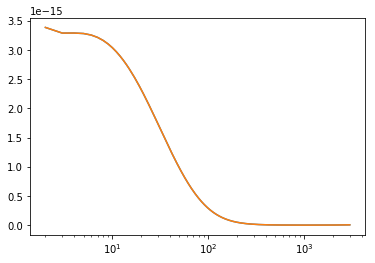

In [438]:
# error detected.  Plot for comparison
plt.semilogx(ells,covar[0,0])
plt.semilogx(ells,cov_kk2)
plt.show()
# looks good now!

# Get inverse covariance matrices

In [439]:
# get inverse covariance matrices
invCovBins = []
for binNum in range(nBins):
    invCovBins.append( np.transpose(np.linalg.inv(np.transpose(covarBins[binNum]))) )


# Assemble the $F_{ij}$ matrices and add them up

In [440]:
def makeFij(dClVecs,invCov,nParams):
    """
    This may replace the previous makeFisher function... blah blah blah.
    Inputs:
        all must have same ell range.  All ell values will be summed over.
    """
    for i in range(nParams):
      dClVec_i = dClVecs[:,i,:] # shape (nCls,nElls)
      for j in range(nParams):
        dClVec_j = dClVecs[:,j,:] # shape (nCls,nElls)
        # here is the summation over ell:
        for ellInd in range(invCov.shape[2]):
          fij = np.dot(dClVec_i[:,ellInd],np.dot(invCov[:,:,ellInd],dClVec_j[:,ellInd]))
          Fij[i,j] += fij
    return Fij


In [441]:
# cut to myLmin in first bin
#myLmin = 50
minEllInd = myLmin-lmin
dClVecsBins[0] = dClVecsBins[0][:,:,minEllInd:]
invCovBins[0]  =  invCovBins[0][:,:,minEllInd:]

In [442]:
# assemble the avengers

Fij = np.zeros((Fobj.nParams,Fobj.nParams)) # indices match those in paramList
for binNum in range(nBins):
    Fij += makeFij(dClVecsBins[binNum],invCovBins[binNum],Fobj.nParams)

# add the low-ell kappa-only part (high ell part was binNum = nBins-1)
Fij[:nCosParams,:nCosParams] += Fij_kk2


In [443]:
# cut out bin1 from Fij and paramList since it was never used
Fij = fixParam(Fij,nCosParams)
paramList = np.delete(paramList,nCosParams,0)

print paramList
#print Fij

['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'wa' 'w' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6']


In [444]:
# check sigmas
def getSigmas(Fij):
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
 
sigmas3 = getSigmas(Fij)
print sigmas3

[3.03221221e-02 8.60378614e-02 8.55649646e-04 1.86526946e-09
 1.08838822e-01 1.10512143e+02 9.52742142e-01 2.00193559e+01
 9.20412746e+00 4.69037156e-01 4.19955118e-01 8.52408329e-01
 2.65243544e+00 1.73534643e+01]


# Adjust parameters

In [445]:
# get the TE matrix
FijTE = Fobj.makeFisher(50,TE=True)
print 'done'

getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE part above ell=3000...
getting EE par

In [446]:
# create combined Fisher matrices
Fij_kgTE2 = Fij.copy()
Fij_kgTE2[:nCosParams,:nCosParams] += FijTE

In [447]:
# apply fsky
fsky = 0.4
Fij       *= fsky
Fij_kgTE2 *= fsky
Fij_kk2   *= fsky

In [448]:
# Convert As to 10^9*As
#"""
AsIndex = 3
mult = 1e-9
def rowColMult(array,index,mult):
    array[index,:] *= mult
    array[:,index] *= mult
    return array
    
Fij       = rowColMult(Fij,AsIndex,mult)
Fij_kgTE2 = rowColMult(Fij_kgTE2,AsIndex,mult)
Fij_kk2   = rowColMult(Fij_kk2,AsIndex,mult)

# adjust name
paramList[AsIndex] = '10^9 As'
print paramList
#"""

['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'wa' 'w'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6']


In [449]:
# transform basis from cosmomc_theta to HO
# use derivative results from "Transform Fisher Matrix with Jacobian"
if nCosParams == 8:
    dthetas = [-2.46099289e-02,  1.05373002e-02,  2.98929388e-05,  # dtheta_dombh2, dtheta_domch2, dtheta_dH0
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,   # dtheta_dAs, dtheta_dns, dtheta_dtau
               1.94175593e-04,  8.94926461e-04]                    # dtheta_mnu, dtheta_w
elif nCosParams == 9:
    #dthetas = [-2.46099289e-02,  1.05373002e-02,  2.98929388e-05,  # dtheta_dombh2, dtheta_domch2, dtheta_dH0
    #           0.00000000e+00,  0.00000000e+00,  0.00000000e+00,   # dtheta_dAs, dtheta_dns, dtheta_dtau
    #           1.94175593e-04,  2.43189330e-04,  8.94926461e-04]   # dtheta_mnu, dtheta_wa, dtheta_w
    # switch order of w, wa params
    dthetas = [-2.46099289e-02,  1.05373002e-02,  2.98929388e-05,  # dtheta_dombh2, dtheta_domch2, dtheta_dH0
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,   # dtheta_dAs, dtheta_dns, dtheta_dtau
               1.94175593e-04,  8.94926461e-04,  2.43189330e-04]   # dtheta_mnu, dtheta_w, dtheta_wa
else:
    print 'wtf'

In [450]:
# The only derivatives in the Jacobian are on the dtheta/dparam row.
mcIndex = 2
jacobian = np.diag(np.ones(nParams-1)) # nParams-1 where -1 due to no bin1
jacobian[mcIndex,:nCosParams] = dthetas#*100
#jacobian[:,mcIndex] = dthetas#*100

# multiply these all by d{100thetamc}/d{thetamc} = 100
#jacobian[mcIndex,:] *= 100
#jacobian[:,mcIndex] *= 100

print jacobian[:nCosParams,:nCosParams]

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.46099289e-02  1.05373002e-02  2.98929388e-05  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.94175593e-04  2.43189330e-04
   8.94926461e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.0000000

In [451]:
# jacobian-it-up
Fij_kg2j   = np.dot(jacobian.T,np.dot(Fij,jacobian))
Fij_kgTE2j = np.dot(jacobian.T,np.dot(Fij_kgTE2,jacobian))
Fij_kk2j = np.dot(jacobian.T[:nCosParams,:nCosParams],np.dot(Fij_kk2,jacobian[:nCosParams,:nCosParams]))

# adjust name
paramList[mcIndex] = 'H0'
print paramList

['ombh2' 'omch2' 'H0' '10^9 As' 'ns' 'tau' 'mnu' 'wa' 'w' 'bin2' 'bin3'
 'bin4' 'bin5' 'bin6']


# Get and compare sigmas

In [452]:
sigmaskg = getSigmas(Fij_kg2j)
sigmaskgTE = getSigmas(Fij_kgTE2j)
sigmas_kk2 = getSigmas(Fij_kk2j)
sigmas_kk2 = np.concatenate((sigmas_kk2,1/np.zeros(nBins)))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.


In [453]:
from prettytable import PrettyTable

print 'fsky = ',fsky

print 'kappa-galaxies and kappa-galaxies + TE, with noise'
t = PrettyTable(['Parameter','sigmas_kk_bin1','sigmas_kg','sigmas_kg+TE','percent diff.'])
for i,p in enumerate(paramList):
    Skk2 = sigmas_kk2[i]
    Zi = sigmaskg[i]
    Bi = sigmaskgTE[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Skk2,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |      28.3      |   0.0479  |   3.64e-05   |     -99.9     |
|   omch2   |      89.9      |   0.136   |   0.00502    |     -96.3     |
|     H0    |    3.35e+04    |     218   |        4     |     -98.2     |
|  10^9 As  |    1.47e+03    |    2.95   |    0.304     |     -89.7     |
|     ns    |       159      |   0.172   |    0.0194    |     -88.7     |
|    tau    |    2.28e+04    |     175   |    0.0746    |      -100     |
|    mnu    |       344      |    1.51   |    0.363     |     -75.9     |
|     wa    |    4.37e+03    |    31.7   |    0.961     |       -97     |
|     w     |    1.84e+03    |    14.6   |    0.0193    |     -99.9     |
|    bin2   |       inf      |   0.742   |    0.4

In [454]:
# fix wa for comparison
doWa = True
#doWa = False

# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

# ditch wa
if doWa:
    wIndex = 7 # 7 for wa
    # copied from above.  Need to modify
    Fij_kg2j_nw = fixParam(Fij_kg2j,wIndex)
    Fij_kgTE2j_nw = fixParam(Fij_kgTE2j,wIndex)
    Fij_kk2j_nw = fixParam(Fij_kk2j,wIndex)

    paramList = np.delete(paramList,wIndex)
    print paramList

['ombh2' 'omch2' 'H0' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'bin2' 'bin3' 'bin4'
 'bin5' 'bin6']


In [455]:
# get sigmas
if doWa:
    sigmaskg_nw = getSigmas(Fij_kg2j_nw)
    sigmaskgTE_nw = getSigmas(Fij_kgTE2j_nw)
    sigmaskk_nw = getSigmas(Fij_kk2j_nw)
    sigmaskk_nw = np.concatenate((sigmaskk_nw,1/np.zeros(nBins)))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  


In [456]:
if doWa:
    print 'marginalized over w_a'
    print 'fsky = ',fsky

    print 'kappa-galaxies and kappa-galaxies + TE, with noise'
    t = PrettyTable(['Parameter','sigmas_kk_bin1','sigmas_kg','sigmas_kg+TE','percent diff.'])
    for i,p in enumerate(paramList):
        Skk2 = sigmaskk_nw[i]
        Zi = sigmaskg_nw[i]
        Bi = sigmaskgTE_nw[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Skk2,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t

marginalized over w_a
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |      18.9      |   0.0477  |   3.64e-05   |     -99.9     |
|   omch2   |      57.8      |   0.135   |    0.005     |     -96.3     |
|     H0    |    3.32e+04    |     120   |     3.71     |     -96.9     |
|  10^9 As  |    1.05e+03    |    2.89   |    0.0728    |     -97.5     |
|     ns    |      91.3      |   0.171   |    0.0194    |     -88.7     |
|    tau    |    2.27e+04    |     150   |    0.0308    |      -100     |
|    mnu    |       113      |    1.08   |    0.286     |     -73.6     |
|     w     |       642      |    2.65   |    0.0192    |     -99.3     |
|    bin2   |       inf      |   0.673   |    0.399     |     -40.6     |
|    bin3   |       inf    

In [457]:
"""
linear P(k)
Using new dCl/dw (called w2) and w0,wa:
kmax = 0.1
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |       650      |   0.0687  |   3.64e-05   |     -99.9     |
|   omch2   |    2.04e+03    |   0.195   |   0.00557    |     -97.1     |
|     H0    |    1.4e+06     |     310   |     4.32     |     -98.6     |
|  10^9 As  |    3.36e+04    |    4.23   |    0.417     |     -90.1     |
|     ns    |    3.32e+03    |    0.24   |    0.0221    |     -90.8     |
|    tau    |    6.15e+04    |     281   |    0.102     |      -100     |
|    mnu    |    4.65e+03    |    2.13   |    0.405     |       -81     |
|     wa    |    5.3e+04     |      40   |     1.35     |     -96.6     |
|     w     |    3.85e+04    |    18.9   |    0.0193    |     -99.9     |
|    bin2   |       inf      |    1.17   |    0.522     |     -55.4     |
|    bin3   |       inf      |    1.01   |    0.699     |     -30.6     |
|    bin4   |       inf      |    1.87   |     1.79     |     -4.46     |
|    bin5   |       inf      |    5.81   |     5.75     |     -0.988    |
|    bin6   |       inf      |    35.1   |     17.8     |     -49.2     |
+-----------+----------------+-----------+--------------+---------------+
kmax = 0.2
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |      28.3      |   0.0479  |   3.64e-05   |     -99.9     |
|   omch2   |      89.9      |   0.136   |   0.00502    |     -96.3     |
|     H0    |    3.35e+04    |     218   |        4     |     -98.2     |
|  10^9 As  |    1.47e+03    |    2.95   |    0.304     |     -89.7     |
|     ns    |       159      |   0.172   |    0.0194    |     -88.7     |
|    tau    |    2.28e+04    |     175   |    0.0746    |      -100     |
|    mnu    |       344      |    1.51   |    0.363     |     -75.9     |
|     wa    |    4.37e+03    |    31.7   |    0.961     |       -97     |
|     w     |    1.84e+03    |    14.6   |    0.0193    |     -99.9     |
|    bin2   |       inf      |   0.742   |    0.405     |     -45.4     |
|    bin3   |       inf      |   0.664   |     0.52     |     -21.7     |
|    bin4   |       inf      |    1.35   |     1.33     |     -1.57     |
|    bin5   |       inf      |    4.19   |     4.18     |     -0.41     |
|    bin6   |       inf      |    27.4   |     13.2     |     -51.9     |
+-----------+----------------+-----------+--------------+---------------+
"""

'\nlinear P(k)\nUsing new dCl/dw (called w2) and w0,wa:\nkmax = 0.1\nfsky =  0.4\nkappa-galaxies and kappa-galaxies + TE, with noise\n+-----------+----------------+-----------+--------------+---------------+\n| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |\n+-----------+----------------+-----------+--------------+---------------+\n|   ombh2   |       650      |   0.0687  |   3.64e-05   |     -99.9     |\n|   omch2   |    2.04e+03    |   0.195   |   0.00557    |     -97.1     |\n|     H0    |    1.4e+06     |     310   |     4.32     |     -98.6     |\n|  10^9 As  |    3.36e+04    |    4.23   |    0.417     |     -90.1     |\n|     ns    |    3.32e+03    |    0.24   |    0.0221    |     -90.8     |\n|    tau    |    6.15e+04    |     281   |    0.102     |      -100     |\n|    mnu    |    4.65e+03    |    2.13   |    0.405     |       -81     |\n|     wa    |    5.3e+04     |      40   |     1.35     |     -96.6     |\n|     w     |    3.85e+04    |    18.9   

In [458]:
"""
linear P(k)
Using new dCl/dw (called w2)
kmax = 0.1
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |       534      |   0.0668  |   3.64e-05   |     -99.9     |
|   omch2   |    1.65e+03    |   0.189   |   0.00556    |     -97.1     |
|     H0    |    9.03e+05    |     184   |     4.03     |     -97.8     |
|  10^9 As  |    2.75e+04    |    4.03   |    0.0933    |     -97.7     |
|     ns    |    2.64e+03    |   0.233   |    0.0219    |     -90.6     |
|    tau    |    6.02e+04    |     240   |    0.0377    |      -100     |
|    mnu    |    1.4e+03     |    1.55   |    0.312     |     -79.8     |
|     w     |    1.61e+04    |    4.04   |    0.0192    |     -99.5     |
|    bin2   |       inf      |    1.05   |    0.517     |     -50.9     |
|    bin3   |       inf      |       1   |    0.696     |     -30.6     |
|    bin4   |       inf      |    1.86   |     1.78     |     -4.63     |
|    bin5   |       inf      |     5.8   |     5.74     |     -1.15     |
|    bin6   |       inf      |    17.9   |     17.8     |     -0.583    |
+-----------+----------------+-----------+--------------+---------------+

kmax = 0.2
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |      18.9      |   0.0477  |   3.64e-05   |     -99.9     |
|   omch2   |      57.8      |   0.135   |    0.005     |     -96.3     |
|     H0    |    3.32e+04    |     120   |     3.71     |     -96.9     |
|  10^9 As  |    1.05e+03    |    2.89   |    0.0728    |     -97.5     |
|     ns    |      91.3      |   0.171   |    0.0194    |     -88.7     |
|    tau    |    2.27e+04    |     150   |    0.0308    |      -100     |
|    mnu    |       113      |    1.08   |    0.286     |     -73.6     |
|     w     |       642      |    2.65   |    0.0192    |     -99.3     |
|    bin2   |       inf      |   0.673   |    0.399     |     -40.6     |
|    bin3   |       inf      |    0.66   |     0.52     |     -21.2     |
|    bin4   |       inf      |    1.34   |     1.32     |      -1.5     |
|    bin5   |       inf      |    4.19   |     4.17     |     -0.523    |
|    bin6   |       inf      |    13.2   |     13.2     |     -0.288    |
+-----------+----------------+-----------+--------------+---------------+

"""

'\nlinear P(k)\nUsing new dCl/dw (called w2)\nkmax = 0.1\nfsky =  0.4\nkappa-galaxies and kappa-galaxies + TE, with noise\n+-----------+----------------+-----------+--------------+---------------+\n| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |\n+-----------+----------------+-----------+--------------+---------------+\n|   ombh2   |       534      |   0.0668  |   3.64e-05   |     -99.9     |\n|   omch2   |    1.65e+03    |   0.189   |   0.00556    |     -97.1     |\n|     H0    |    9.03e+05    |     184   |     4.03     |     -97.8     |\n|  10^9 As  |    2.75e+04    |    4.03   |    0.0933    |     -97.7     |\n|     ns    |    2.64e+03    |   0.233   |    0.0219    |     -90.6     |\n|    tau    |    6.02e+04    |     240   |    0.0377    |      -100     |\n|    mnu    |    1.4e+03     |    1.55   |    0.312     |     -79.8     |\n|     w     |    1.61e+04    |    4.04   |    0.0192    |     -99.5     |\n|    bin2   |       inf      |    1.05   |    0.517 

In [459]:
"""
nonlinear P(k)
Using new dCl/dw (called w2) and w0,wa:
kmax = 0.1
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |       511      |   0.0625  |   3.64e-05   |     -99.9     |
|   omch2   |    1.6e+03     |   0.202   |   0.00455    |     -97.8     |
|     H0    |    1.36e+06    |     513   |     23.7     |     -95.4     |
|  10^9 As  |    2.87e+04    |    3.72   |    0.373     |     -89.9     |
|     ns    |    2.9e+03     |   0.462   |    0.0257    |     -94.4     |
|    tau    |    6.83e+04    |     269   |    0.104     |      -100     |
|    mnu    |    6.02e+03    |    1.19   |    0.337     |     -71.7     |
|     wa    |    3.68e+04    |    24.3   |    0.317     |     -98.7     |
|     w     |    2.76e+04    |    10.4   |    0.218     |     -97.9     |
|    bin2   |       inf      |   0.832   |    0.519     |     -37.6     |
|    bin3   |       inf      |   0.807   |    0.702     |       -13     |
|    bin4   |       inf      |    1.86   |      1.8     |     -3.41     |
|    bin5   |       inf      |     5.9   |     5.79     |     -1.87     |
|    bin6   |       inf      |    31.5   |     17.8     |     -43.4     |
+-----------+----------------+-----------+--------------+---------------+

kmax = 0.2
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |      53.2      |   0.0387  |   3.64e-05   |     -99.9     |
|   omch2   |       163      |   0.118   |   0.00375    |     -96.8     |
|     H0    |    1.14e+05    |     315   |     17.2     |     -94.5     |
|  10^9 As  |    2.99e+03    |    2.42   |    0.288     |     -88.1     |
|     ns    |       275      |    0.25   |    0.0209    |     -91.6     |
|    tau    |    2.54e+04    |     168   |    0.0814    |      -100     |
|    mnu    |       939      |   0.875   |     0.28     |       -68     |
|     wa    |    6.2e+03     |    14.5   |    0.229     |     -98.4     |
|     w     |    4.73e+03    |    6.29   |    0.158     |     -97.5     |
|    bin2   |       inf      |   0.596   |    0.395     |     -33.7     |
|    bin3   |       inf      |   0.633   |    0.517     |     -18.4     |
|    bin4   |       inf      |    1.36   |     1.33     |     -1.82     |
|    bin5   |       inf      |    4.25   |     4.21     |     -0.889    |
|    bin6   |       inf      |      21   |     13.2     |     -36.9     |
+-----------+----------------+-----------+--------------+---------------+
"""

'\nnonlinear P(k)\nUsing new dCl/dw (called w2) and w0,wa:\nkmax = 0.1\nfsky =  0.4\nkappa-galaxies and kappa-galaxies + TE, with noise\n+-----------+----------------+-----------+--------------+---------------+\n| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |\n+-----------+----------------+-----------+--------------+---------------+\n|   ombh2   |       511      |   0.0625  |   3.64e-05   |     -99.9     |\n|   omch2   |    1.6e+03     |   0.202   |   0.00455    |     -97.8     |\n|     H0    |    1.36e+06    |     513   |     23.7     |     -95.4     |\n|  10^9 As  |    2.87e+04    |    3.72   |    0.373     |     -89.9     |\n|     ns    |    2.9e+03     |   0.462   |    0.0257    |     -94.4     |\n|    tau    |    6.83e+04    |     269   |    0.104     |      -100     |\n|    mnu    |    6.02e+03    |    1.19   |    0.337     |     -71.7     |\n|     wa    |    3.68e+04    |    24.3   |    0.317     |     -98.7     |\n|     w     |    2.76e+04    |    10.4

In [460]:
"""
nonlinear P(k)
Using new dCl/dw (called w2)
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |       446      |   0.0547  |   3.64e-05   |     -99.9     |
|   omch2   |    1.38e+03    |   0.175   |   0.00421    |     -97.6     |
|     H0    |    1.34e+06    |     210   |      3.2     |     -98.5     |
|  10^9 As  |    2.51e+04    |    3.05   |    0.106     |     -96.5     |
|     ns    |    2.47e+03    |   0.399   |    0.0198    |       -95     |
|    tau    |    6.2e+04     |     267   |    0.0392    |      -100     |
|    mnu    |    3.68e+03    |    1.07   |    0.267     |     -75.1     |
|     w     |    1.35e+04    |    2.49   |    0.0241    |       -99     |
|    bin2   |       inf      |   0.804   |    0.518     |     -35.6     |
|    bin3   |       inf      |   0.804   |    0.695     |     -13.5     |
|    bin4   |       inf      |    1.81   |     1.78     |     -1.61     |
|    bin5   |       inf      |    5.82   |     5.78     |     -0.658    |
|    bin6   |       inf      |    17.9   |     17.8     |    -0.0984    |
+-----------+----------------+-----------+--------------+---------------+

kmax = 02
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |      24.9      |   0.0361  |   3.64e-05   |     -99.9     |
|   omch2   |      77.4      |   0.109   |   0.00341    |     -96.9     |
|     H0    |    7.87e+04    |     150   |     2.75     |     -98.2     |
|  10^9 As  |    1.45e+03    |    2.15   |    0.085     |     -96.1     |
|     ns    |       139      |    0.23   |    0.0157    |     -93.2     |
|    tau    |    2.38e+04    |     168   |    0.031     |      -100     |
|    mnu    |       253      |   0.811   |    0.226     |     -72.1     |
|     w     |       805      |    1.76   |    0.0241    |     -98.6     |
|    bin2   |       inf      |   0.578   |    0.394     |     -31.8     |
|    bin3   |       inf      |   0.617   |    0.514     |     -16.7     |
|    bin4   |       inf      |    1.34   |     1.32     |     -1.44     |
|    bin5   |       inf      |    4.22   |      4.2     |     -0.315    |
|    bin6   |       inf      |    13.3   |     13.2     |     -0.101    |
+-----------+----------------+-----------+--------------+---------------+
"""

'\nnonlinear P(k)\nUsing new dCl/dw (called w2)\nfsky =  0.4\nkappa-galaxies and kappa-galaxies + TE, with noise\n+-----------+----------------+-----------+--------------+---------------+\n| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |\n+-----------+----------------+-----------+--------------+---------------+\n|   ombh2   |       446      |   0.0547  |   3.64e-05   |     -99.9     |\n|   omch2   |    1.38e+03    |   0.175   |   0.00421    |     -97.6     |\n|     H0    |    1.34e+06    |     210   |      3.2     |     -98.5     |\n|  10^9 As  |    2.51e+04    |    3.05   |    0.106     |     -96.5     |\n|     ns    |    2.47e+03    |   0.399   |    0.0198    |       -95     |\n|    tau    |    6.2e+04     |     267   |    0.0392    |      -100     |\n|    mnu    |    3.68e+03    |    1.07   |    0.267     |     -75.1     |\n|     w     |    1.35e+04    |    2.49   |    0.0241    |       -99     |\n|    bin2   |       inf      |   0.804   |    0.518     |    

In [461]:
"""
nonlinear P(k)
With the old dCl/dw

kmax = 0.1
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |       237      |   0.0508  |   1.32e-05   |      -100     |
|   omch2   |       769      |   0.155   |   0.000529   |     -99.7     |
|     H0    |    6.6e+05     |     243   |     2.69     |     -98.9     |
|  10^9 As  |    1.35e+04    |    3.11   |    0.0588    |     -98.1     |
|     ns    |    1.49e+03    |   0.336   |   0.00173    |     -99.5     |
|    tau    |    5.44e+04    |     268   |    0.0138    |      -100     |
|    mnu    |    2.03e+03    |     1.2   |    0.148     |     -87.6     |
|     w     |    5.99e+03    |    2.97   |    0.0551    |     -98.1     |
|    bin2   |       inf      |   0.884   |    0.516     |     -41.7     |
|    bin3   |       inf      |    0.81   |    0.688     |     -15.1     |
|    bin4   |       inf      |    1.81   |     1.78     |      -1.8     |
|    bin5   |       inf      |    5.83   |     5.78     |     -0.949    |
|    bin6   |       inf      |    18.8   |     17.8     |     -4.99     |
+-----------+----------------+-----------+--------------+---------------+

kmax = 0.2
fsky =  0.4
kappa-galaxies and kappa-galaxies + TE, with noise
+-----------+----------------+-----------+--------------+---------------+
| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |
+-----------+----------------+-----------+--------------+---------------+
|   ombh2   |      40.3      |   0.0364  |   1.32e-05   |      -100     |
|   omch2   |       125      |   0.106   |   0.000503   |     -99.5     |
|     H0    |    1.31e+05    |     176   |     2.54     |     -98.6     |
|  10^9 As  |    2.3e+03     |    2.29   |    0.0579    |     -97.5     |
|     ns    |       222      |   0.205   |   0.00172    |     -99.2     |
|    tau    |    2.25e+04    |     174   |    0.0136    |      -100     |
|    mnu    |       404      |   0.896   |    0.138     |     -84.6     |
|     w     |    1.32e+03    |    2.11   |    0.0483    |     -97.7     |
|    bin2   |       inf      |   0.621   |    0.393     |     -36.8     |
|    bin3   |       inf      |   0.629   |    0.509     |     -19.1     |
|    bin4   |       inf      |    1.34   |     1.32     |     -1.65     |
|    bin5   |       inf      |    4.22   |      4.2     |     -0.445    |
|    bin6   |       inf      |    13.8   |     13.2     |     -4.27     |
+-----------+----------------+-----------+--------------+---------------+

now wait.. why did the kk column change?  wtf? Does it get bigger after each run?
"""

'\nnonlinear P(k)\nWith the old dCl/dw\n\nkmax = 0.1\nfsky =  0.4\nkappa-galaxies and kappa-galaxies + TE, with noise\n+-----------+----------------+-----------+--------------+---------------+\n| Parameter | sigmas_kk_bin1 | sigmas_kg | sigmas_kg+TE | percent diff. |\n+-----------+----------------+-----------+--------------+---------------+\n|   ombh2   |       237      |   0.0508  |   1.32e-05   |      -100     |\n|   omch2   |       769      |   0.155   |   0.000529   |     -99.7     |\n|     H0    |    6.6e+05     |     243   |     2.69     |     -98.9     |\n|  10^9 As  |    1.35e+04    |    3.11   |    0.0588    |     -98.1     |\n|     ns    |    1.49e+03    |   0.336   |   0.00173    |     -99.5     |\n|    tau    |    5.44e+04    |     268   |    0.0138    |      -100     |\n|    mnu    |    2.03e+03    |     1.2   |    0.148     |     -87.6     |\n|     w     |    5.99e+03    |    2.97   |    0.0551    |     -98.1     |\n|    bin2   |       inf      |   0.884   |    0.516     

# Export to CosmicFish

In [462]:
# setup for saving files in directory structure
import os

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)


In [463]:
if kmax == 0.1:
    dirName = 'Z_test_5' # uses gk, kgTE with noise and kmax=0.1 limit
elif kmax == 0.2:
    dirName = 'Z_test_6' # uses gk, kgTE with noise and kmax=0.2 limit
else:
    dirName = 'Z_wrong_kmax'
createFolder(dirName)

createFolder(dirName+'/parameters_analysis')
createFolder(dirName+'/raw_results')
createFolder(dirName+'/results')

In [464]:
# fill the raw_results directory
#"""
import os
os.chdir(dirName+'/raw_results')

np.savetxt('2_'+dirName+'_fisher_matrix_Fijkg_cls.dat',Fij_kg2j,fmt='%26.16E', #delimiter='\t',
           header='This file contains a Fisher matrix created with the FisherCl code.')
np.savetxt('5_'+dirName+'_fisher_matrix_FijkgTE_cls.dat',Fij_kgTE2j,fmt='%26.16E', #delimiter='\t',
           header='This file contains a Fisher matrix created with the FisherCl code.')

# add some code to do the .paramnames files too... but not now

os.chdir('../..')
#"""


In [465]:
# get binBs
binBs = Fobj.binBs
print binBs

[1.27067632 1.69710864 2.3610698  2.91412519 3.65051625 5.32683556]
